# Exploring Coffee Production

In [1]:
%matplotlib inline 

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation
from sklearn import metrics

/home/kevin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
style.use('ggplot')

In [5]:
# Read in CSV File
df = pd.read_csv('JHM_JBM98_17_2.csv')

In [6]:
# Preview the dataset
df.head()

,Altitude (m),Elevation range,Producing Districts per Main Group,Head Count to Main Groups (2004),Head Count to Main Groups (2012),Change in Group size (2012 minus 2004),2009/10,2010/11,2011/12,Average
0,198,Low,8,68,63,-5,1170.5,660.7,182.8,671.3
1,198,Low,10,174,390,216,2104.8,1539.0,909.8,1517.8
2,200,Low,23,213,318,105,1268.3,1276.5,1415.5,1320.1
3,209,Low,7,149,140,-9,649.2,326.3,102.3,359.2
4,237,Low,10,105,306,201,2516.8,1988.5,2787.3,2430.8


In [7]:
# Check if there are any empty values
df.isnull().any()

Altitude (m)                              False
Elevation range                           False
Producing Districts per Main Group        False
Head Count to Main Groups (2004)          False
Head Count to Main Groups (2012)          False
Change in Group size (2012 minus 2004)    False
2009/10                                   False
2010/11                                   False
2011/12                                   False
Average                                   False
dtype: bool

In [8]:
#Check the Shape of the dataset
df.shape

(63, 10)

In [9]:
df['AVG_Head_Count_2004_2012']=(df['Head Count to Main Groups (2004)']+df['Head Count to Main Groups (2012)'])/2.0
df['Final_AVG'] = df['Average ']
#df=df[['Parish ','Main Group','Altitude (m)','Producing Districts per Main Group','AVG_Head_Count_2004_2012','Final_AVG']]
df=df[['Altitude (m)','Producing Districts per Main Group','AVG_Head_Count_2004_2012','Final_AVG']]



In [10]:
# Look at the dataset again
df.head(20)

,Altitude (m),Producing Districts per Main Group,AVG_Head_Count_2004_2012,Final_AVG
0,198,8,65.5,671.3
1,198,10,282.0,1517.8
2,200,23,265.5,1320.1
3,209,7,144.5,359.2
4,237,10,205.5,2430.8
5,237,3,31.5,7.2
6,266,1,108.0,352.3
7,302,5,151.0,3335.2
8,335,9,55.5,937.8
9,351,6,204.0,7135.2


In [11]:
#Check the shape again
df.shape

(63, 4)

In [12]:
print(df.describe())

       Altitude (m)  Producing Districts per Main Group  \
count     63.000000                           63.000000   
mean     531.984127                            5.857143   
std      293.041310                            4.560904   
min       73.000000                            1.000000   
25%      301.500000                            2.000000   
50%      505.000000                            5.000000   
75%      783.000000                            8.000000   
max     1274.000000                           23.000000   

       AVG_Head_Count_2004_2012     Final_AVG  
count                 63.000000     63.000000  
mean                 213.682540   3523.128571  
std                  170.842157   4058.979565  
min                    1.500000      0.000000  
25%                   93.750000    911.250000  
50%                  173.000000   1948.500000  
75%                  283.750000   4916.550000  
max                  818.500000  19757.000000  


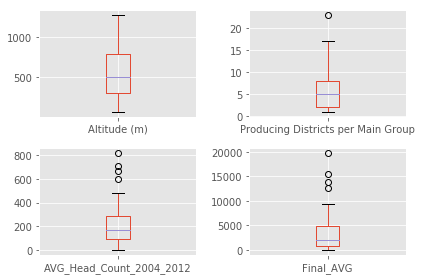

In [13]:
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

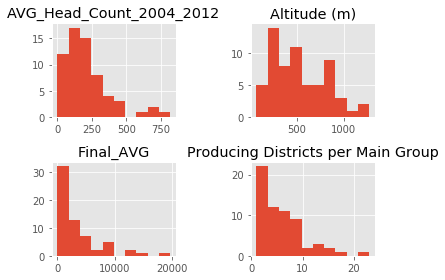

In [14]:
#Create histogram
df.hist()
plt.tight_layout()
plt.show()


/home/kevin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


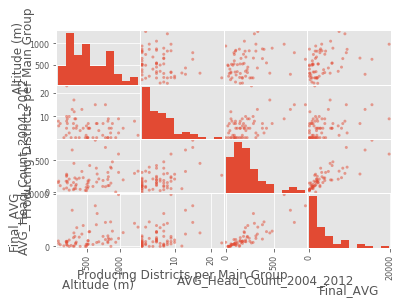

In [15]:
#Let's try a scatter plot matrix
pd.tools.plotting.scatter_matrix(df)
#plt.tight_layout()
#scatter_matrix(df)
plt.show()

In [16]:
X = np.array(df.drop(['Final_AVG'],1))
y = np.array(df['Final_AVG'])
X_train, X_test, y_train, y_test =cross_validation.train_test_split(X,y,test_size=0.2)

In [17]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
#Calculating the accuracy of our model
accuracy = clf.score(X_test, y_test)
print("The accuracy of the model is:  %f" % accuracy)

The accuracy of the model is:  0.590336


## Predict with Test Values

In [19]:
Y_Predict = clf.predict(X_test)

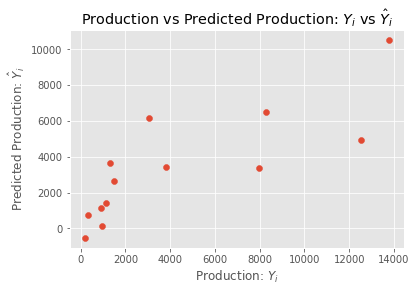

In [20]:
#The scatter plot should create a linear line

plt.scatter(y_test, Y_Predict)
plt.xlabel("Production: $Y_i$")
plt.ylabel("Predicted Production: $\hat{Y}_i$")
plt.title("Production vs Predicted Production: $Y_i$ vs $\hat{Y}_i$")

## Using residual plot to visualize errors in Data. The data should be scattered around line zero

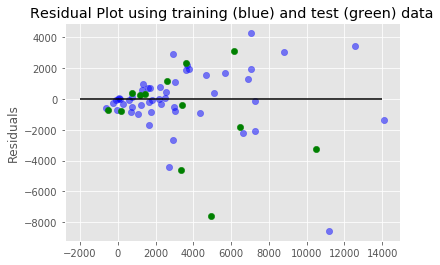

In [21]:
plt.scatter(clf.predict(X_train),clf.predict(X_train) - y_train,c='b',s=40, alpha=0.5)
plt.scatter(clf.predict(X_test), clf.predict(X_test) - y_test, c='g',s=40)
plt.hlines(y=0, xmin=-2000, xmax=14000)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

## Example of Prediction with sample values

In [22]:
X_predict = [[538,5,120]]
y_predict = clf.predict(X_predict)

print ("The Prediction is: %f" % y_predict[0])

The Prediction is: 1735.383903


## Let's calculate the Mean Squared Error

In [23]:
#mse = metrics.mean_squared_error(y_test, Y_Predict)
#print(mse)